# Assignment 1
## Group Members:
* ### Nils Dunlop, e-mail: gusdunlni@student.gu.se
* ### Francisco Alejandro Erazo Piza, e-mail: guserafr@student.gu.se
* ### Chukwudumebi Ubogu, e-mail: gusuboch@student.gu.se

### Part 1: Real estate prices (option 1)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import math

# Read csv and output descriptive statistics
df = pd.read_csv('houses.csv', header=None)

# Compute descriptive statistics
df[1].describe().apply(lambda x: format(x, 'f'))

count      100000.000000
mean       174386.753740
std        351463.397764
min           150.000000
25%         74000.000000
50%        129000.000000
75%        207000.000000
max      48465717.000000
Name: 1, dtype: object

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


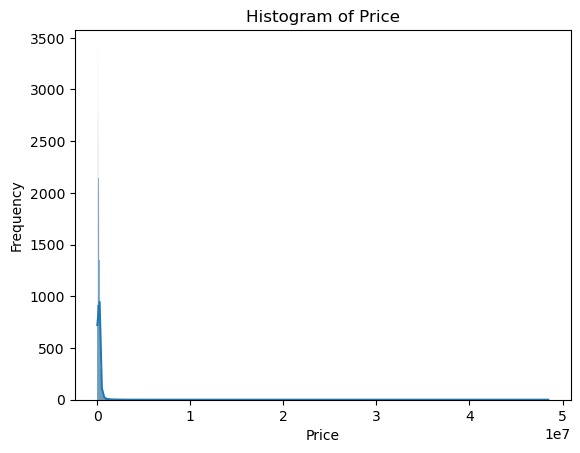

In [2]:
# Plotting an histogram of the price
sns.histplot(df[1], kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The reason why the data is weird is that there are large outliers and that the prices are not unified which makes it hard to compare the prices. To handle the issues we need to normalize the data using a log transforms, or median transformations.

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


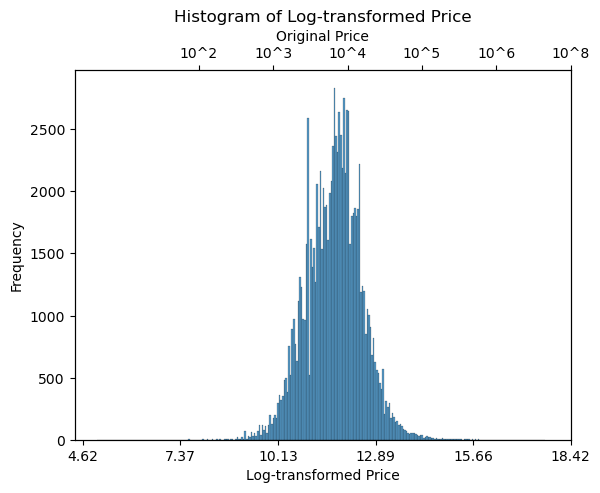

In [3]:
# Calculating the log transformed price
df['log_price'] = np.log(df[1] + 1)

# Calculate bin width using Freedman-Diaconis Rule
IQR = np.percentile(df['log_price'], 75) - np.percentile(df['log_price'], 25)
bin_width = 2 * IQR * (len(df['log_price'])**(-1/3))
bins = int((df['log_price'].max() - df['log_price'].min()) / bin_width)

# Plot histogram
sns.histplot(df['log_price'], bins=bins)
plt.title('Histogram of Log-transformed Price')
plt.xlabel('Log-transformed Price')
plt.ylabel('Frequency')

# Calculate log_ticks for x-axis
min_val = df[1].min()
max_val = df[1].max()
min_exp = np.floor(np.log10(min_val))
max_exp = np.ceil(np.log10(max_val))
original_ticks = np.logspace(min_exp, max_exp, num=6)
log_ticks = np.log([tick + 1 for tick in original_ticks])

# Set x-ticks for log-transformed prices
plt.xticks(log_ticks, labels=np.round(log_ticks, 2))

# Add original prices to the top
ax2 = plt.gca().twiny()
formatted_ticks = ['10^{}'.format(int(np.log10(tick))) for tick in original_ticks]
ax2.set_xlim(plt.gca().get_xlim())
ax2.set_xticks(log_ticks)
ax2.set_xticklabels(formatted_ticks)
ax2.set_xlabel('Original Price')

plt.show()

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

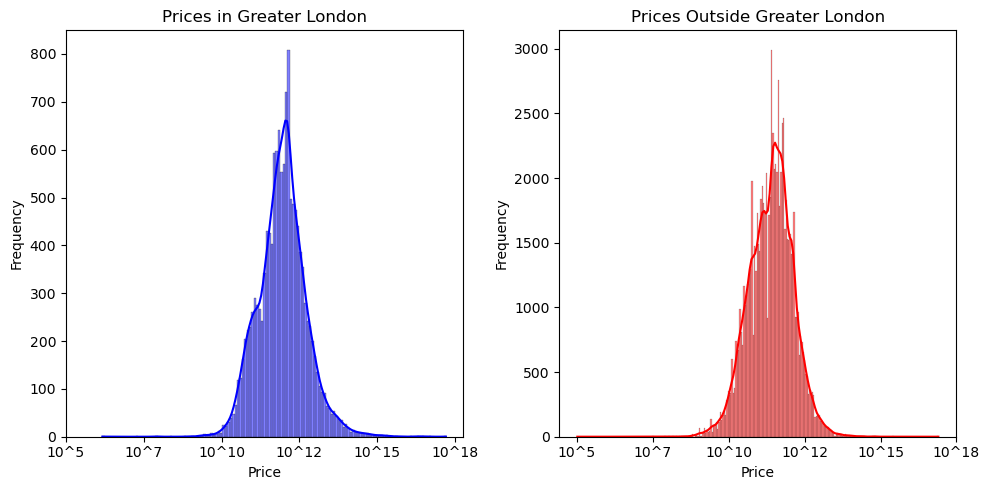

In [4]:
london_df = df[df[13] == 'GREATER LONDON']
outside_london_df = df[df[13] != 'GREATER LONDON']

min_val = min(london_df["log_price"].min(), outside_london_df["log_price"].min())
max_val = max(london_df["log_price"].max(), outside_london_df["log_price"].max())

min_exp = np.floor(min_val)
max_exp = np.ceil(max_val)

log_ticks = np.linspace(min_exp, max_exp, num=6)

formatted_ticks = ['10^{}'.format(int(tick)) for tick in log_ticks]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(london_df["log_price"], color='blue', kde=True)
plt.title('Prices in Greater London')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(log_ticks, formatted_ticks)

plt.subplot(1, 2, 2)
sns.histplot(outside_london_df["log_price"], color='red', kde=True)
plt.title('Prices Outside Greater London')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(log_ticks, formatted_ticks)

plt.tight_layout()
plt.show()

### Part 1: Real estate prices (option 2)

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='1'>

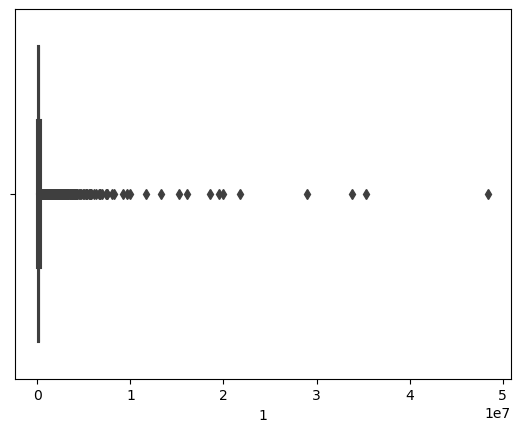

In [5]:
sns.boxplot(data=df, x=1)

The boxplot reveals the presence of outliers, which can negatively impact the creation of a meaningful histogram. Therefore, we removed these outliers by using the IQR (Interquartile Range) Method to ensure an accurate representation of the data in the histogram. 

In [6]:
# Calculate the first quartile (Q1)
q1 = df[1].quantile(0.25)

# Calculate the third quartile (Q3)
q3 = df[1].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate the lower limit for outliers
lower_lim = q1 - 1.5 * iqr

# Calculate the upper limit for outliers
upper_lim = q3 + 1.5 * iqr

# Identify outliers below the lower limit
outliers_low = (df[1] < lower_lim)

# Identify outliers above the upper limit
outliers_up = (df[1] > upper_lim)

In [7]:
outliers_low.value_counts() # There are no outliers below the lower limit

1
False    100000
Name: count, dtype: int64

In [8]:
outliers_up.value_counts() # There are 5671 outliers above the upper limit

1
False    94329
True      5671
Name: count, dtype: int64

In [9]:
df_no_outliers = df[~outliers_up]

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


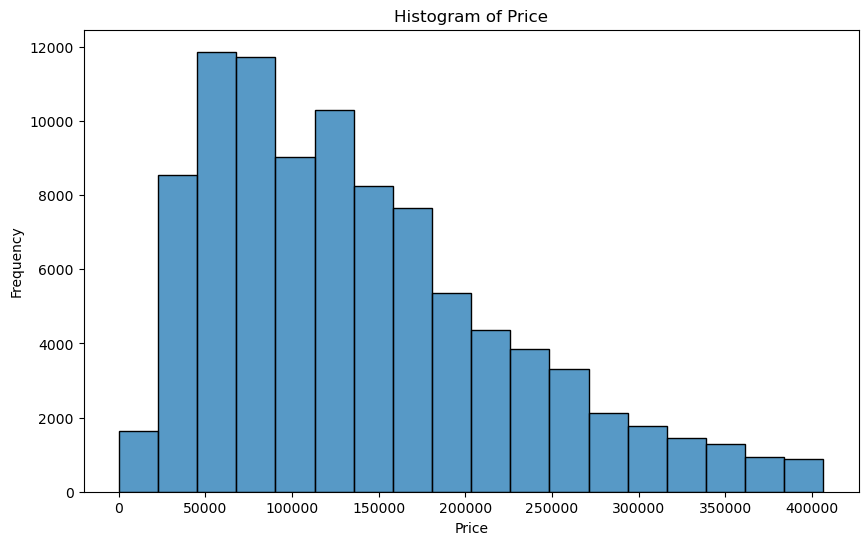

In [10]:
# Plot histogram of price without outliers
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers[1],bins="sturges") # Sturges' rule for number of bins (k) = 1 + log2(n)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

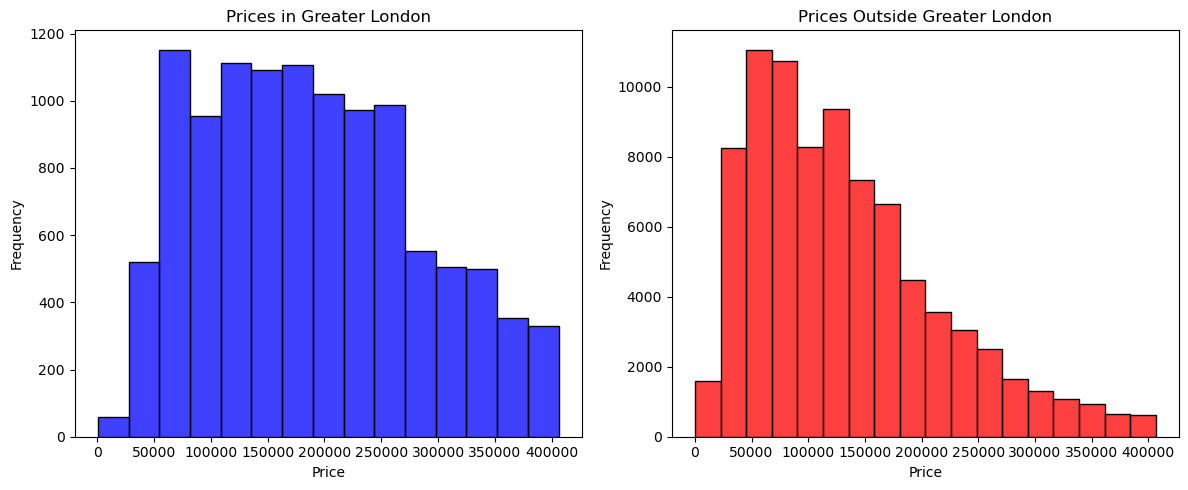

In [11]:
# Create two dataframes: one for prices in Greater London and one for prices outside Greater London
london_df = df_no_outliers[df_no_outliers[13] == 'GREATER LONDON']
outside_london_df = df_no_outliers[df_no_outliers[13] != 'GREATER LONDON']

plt.figure(figsize=(12, 5))
# Plot histogram of prices in Greater London
plt.subplot(1, 2, 1)
sns.histplot(london_df[1], color='blue',bins="sturges")
plt.title('Prices in Greater London')
plt.xlabel('Price')
plt.ylabel('Frequency')
# Plot histogram of prices outside Greater London
plt.subplot(1, 2, 2)
sns.histplot(outside_london_df[1], color='red',bins="sturges")
plt.title('Prices Outside Greater London')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

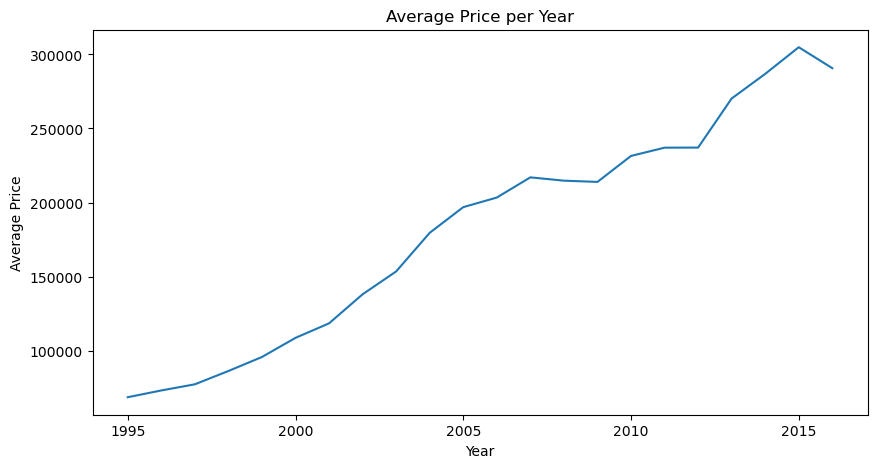

In [12]:
# Change the type of the date column to datetime format
df[2] = pd.to_datetime(df[2])

# Create a new column with the year
df['year'] = df[2].dt.year

# Group by year and calculate the mean price for each year
df_year = df.groupby('year')[1].mean().reset_index()

# Plot the mean price for each year
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_year, x='year', y=1)
plt.title('Average Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


### Part 2: Histogram and quantile

#### (a) Identify the data types of these four columns and plot their distributions

In [13]:
titanic_df = pd.read_csv('titanic_train.csv')

analyze_columns = ["Embarked", "Pclass", "Parch", "Fare"]
sub_titanic_df = titanic_df[analyze_columns]
sub_titanic_df

,Embarked,Pclass,Parch,Fare
0,S,3,0,7.2500
1,C,1,0,71.2833
2,S,3,0,7.9250
3,S,1,0,53.1000
4,S,3,0,8.0500
...,...,...,...,...
886,S,2,0,13.0000
887,S,1,0,30.0000
888,S,3,2,23.4500
889,C,1,0,30.0000


The data types of the four columns are as follows:

* **Embarked**: Nominal Data. This column represents the port where a passanger took the ship, "S", "C" and "Q", are categories without a specific order. 
* **Pclass**: Ordinal Data. This column indicates the class in which each passanger traveled: 1st class, 2nd class, and 3rd class. These categories follow a order, being 1st class the top category and 3rd class the bottom one. However, the differences between classes are not necessarily uniform.
* **Parch**: Discrete (interval) Data. This column shows the number of parents or children on the ship for each passanger. These values can be counted and do not follow a strict order.
* **Fare**: Continuous (ratio) Data. This column represents the amount paid by each passanger for getting their ticket. The fare can take a wide range of continuous values (with decimal precision). Also, these values are uncountable. 

#### (b) Histogram

In [14]:
# Histogram for Parch
parch_counts = dict(Counter(sub_titanic_df['Parch']))
print("Histogram for Parch:", parch_counts)

# Validate with np.histogram
values, bins = np.histogram(sub_titanic_df['Parch'], bins=np.arange(-0.5, sub_titanic_df['Parch'].max()+1.5))
print("Validation using np.histogram for Parch:", dict(zip(bins[:-1], values)))

# Histogram for Fare with 20 bins
fare_range = (sub_titanic_df['Fare'].min(), sub_titanic_df['Fare'].max())
fare_bins = np.linspace(fare_range[0], fare_range[1], 21)
fare_hist = {f"({fare_bins[i]}, {fare_bins[i+1]})": 0 for i in range(20)}

for fare in sub_titanic_df['Fare']:
    for i in range(20):
        if fare_bins[i] <= fare < fare_bins[i+1]:
            fare_hist[f"({fare_bins[i]}, {fare_bins[i+1]})"] += 1
            break

print("\nHistogram for Fare:", fare_hist)

# Validate with np.histogram
values, _ = np.histogram(sub_titanic_df['Fare'], bins=fare_bins)
print("Validation using np.histogram for Fare:", dict(zip(fare_bins[:-1], values)))

Histogram for Parch: {0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1}
Validation using np.histogram for Parch: {-0.5: 678, 0.5: 118, 1.5: 80, 2.5: 5, 3.5: 4, 4.5: 5, 5.5: 1}

Histogram for Fare: {'(0.0, 25.61646)': 562, '(25.61646, 51.23292)': 170, '(51.23292, 76.84938)': 67, '(76.84938, 102.46584)': 39, '(102.46584, 128.0823)': 15, '(128.0823, 153.69876)': 16, '(153.69876, 179.31522)': 2, '(179.31522, 204.93168)': 0, '(204.93168, 230.54814)': 9, '(230.54814, 256.1646)': 2, '(256.1646, 281.78106)': 6, '(281.78106, 307.39752)': 0, '(307.39752, 333.01398)': 0, '(333.01398, 358.63044)': 0, '(358.63044, 384.2469)': 0, '(384.2469, 409.86336)': 0, '(409.86336, 435.47982)': 0, '(435.47982, 461.09628)': 0, '(461.09628, 486.71274)': 0, '(486.71274, 512.3292)': 0}
Validation using np.histogram for Fare: {0.0: 562, 25.61646: 170, 51.23292: 67, 76.84938: 39, 102.46584: 15, 128.0823: 16, 153.69876: 2, 179.31522: 0, 204.93168: 9, 230.54814: 2, 256.1646: 6, 281.78106: 0, 307.39752: 0, 333.01398: 0, 35

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

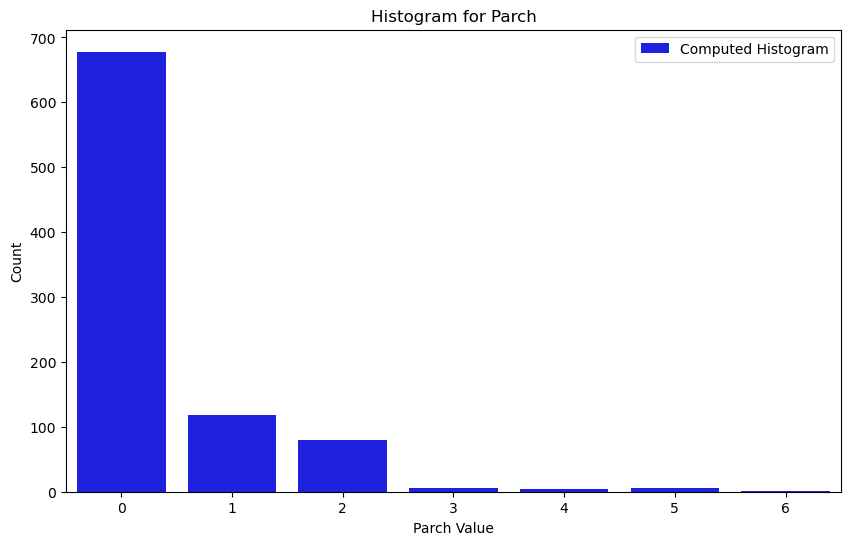

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

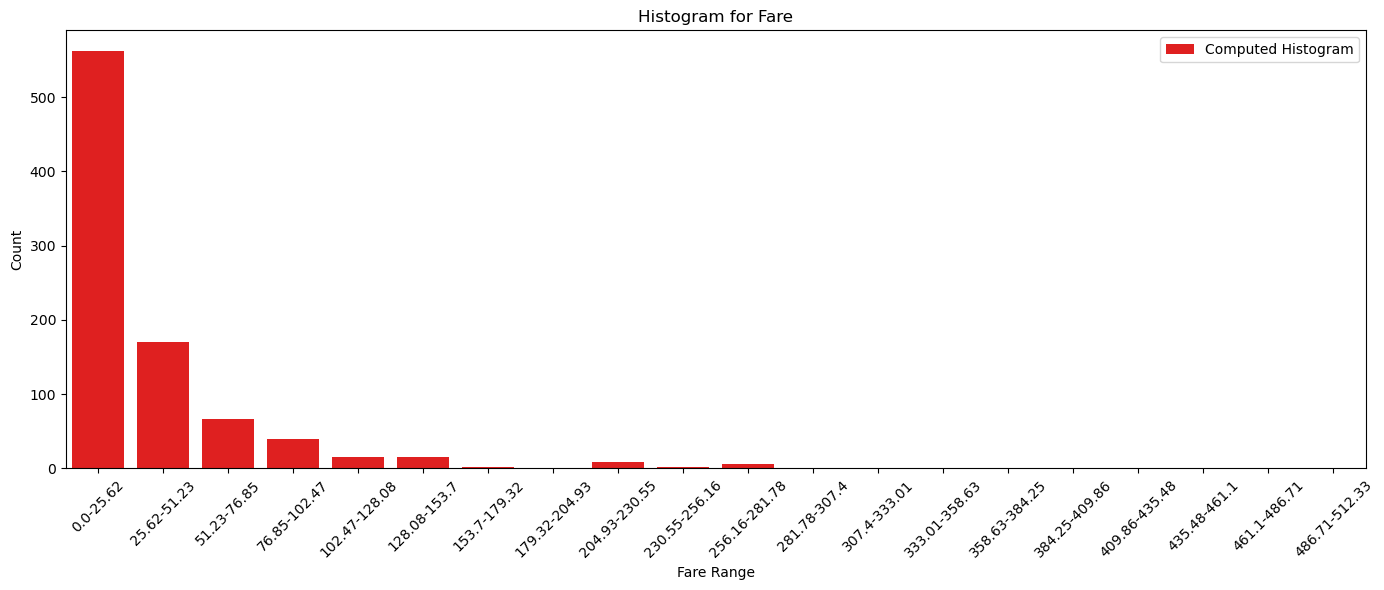

In [15]:
# Plotting histogram for Parch
plt.figure(figsize=(10, 6))
sns.barplot(x=list(parch_counts.keys()), y=list(parch_counts.values()), color='blue', label='Computed Histogram')
plt.xlabel('Parch Value')
plt.ylabel('Count')
plt.title('Histogram for Parch')
plt.legend()
plt.show()

# Plotting histogram for Fare
plt.figure(figsize=(14, 6))
fare_labels = [f"{round(fare_bins[i], 2)}-{round(fare_bins[i+1], 2)}" for i in range(20)]
sns.barplot(x=fare_labels, y=list(fare_hist.values()), color='red', label='Computed Histogram')
plt.xlabel('Fare Range')
plt.ylabel('Count')
plt.title('Histogram for Fare')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

#### (c) Data quantile

In [16]:
# Define the quantile values
quantiles = [0.2, 0.5]

# Sort the data in ascending order
sorted_fares = sorted(sub_titanic_df['Fare'])

def custom_quantile(sorted_data, p):
    n = len(sorted_data)
    index = (n-1) * p
    lower_index = math.floor(index)
    upper_index = math.ceil(index)
    
    if lower_index == upper_index:
        return sorted_data[int(index)]
    else:
        return 0.5 * (sorted_data[lower_index] + sorted_data[upper_index])

q_02 = custom_quantile(sorted_fares, quantiles[0])
q_05 = custom_quantile(sorted_fares, quantiles[1])

assert q_02 == np.quantile(sub_titanic_df['Fare'], 0.2), "Quantile for p=0.2 does not match!"
assert q_05 == np.quantile(sub_titanic_df['Fare'], 0.5), "Quantile for p=0.5 does not match!"

### Part 3: Generating data from probabilistic models

#### (a)

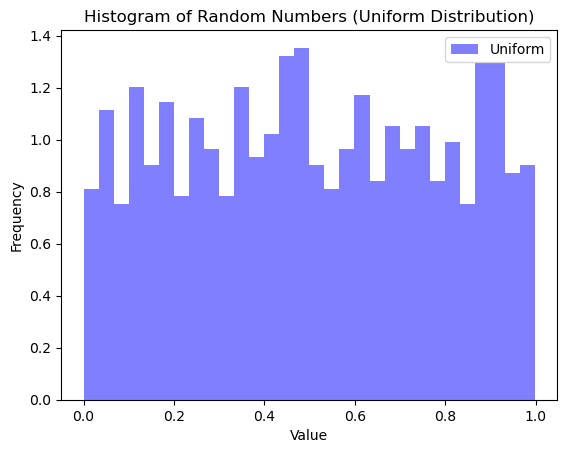

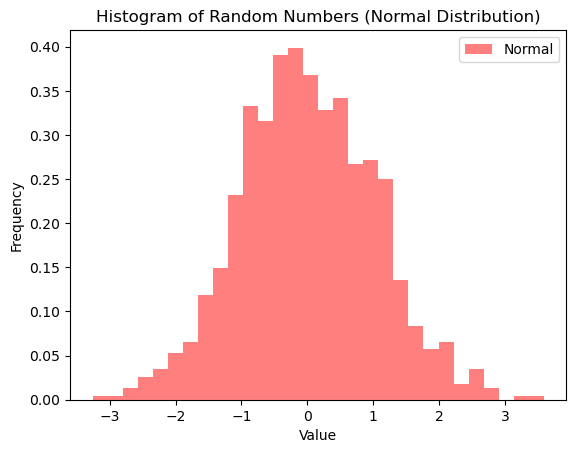

In [17]:
# Generate a set of random numbers using the uniform distribution
random_numbers_uniform = np.random.rand(1000)

# Plot the histogram for the uniform distribution
plt.hist(random_numbers_uniform, bins=30, density=True, alpha=0.5, color='blue', label='Uniform')
plt.title('Histogram of Random Numbers (Uniform Distribution)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Generate a set of random numbers using Normal distribution
random_numbers_normal = np.random.normal(0, 1, 1000) 

# Plot the histogram for the normal distribution
plt.hist(random_numbers_normal, bins=30, density=True, alpha=0.5, color='red', label='Normal')
plt.title('Histogram of Random Numbers (Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### (b) Modeling a student at an exam

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


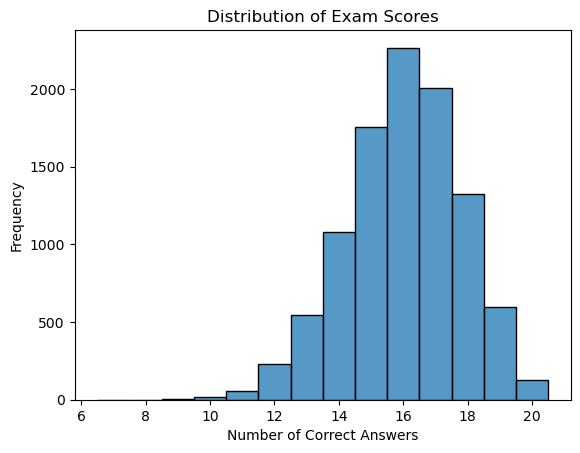

In [18]:
# Defining methods to model a student exam
def success(p_success):
    return bool(np.random.choice([0, 1], p=[1-p_success, p_success]))

def exam_score(p_correct, n_instances):
    correct_answers = sum(success(p_correct) for _ in range(n_instances))
    return correct_answers

# Parameters
p_correct = 0.8
n_instances = 20
n_simulations = 10000

# Simulation
results = [exam_score(p_correct, n_instances) for _ in range(n_simulations)]

# Plot histogram
sns.histplot(results, bins=n_instances, kde=False, discrete=True)
plt.xlabel('Number of Correct Answers')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.show()

#### (c) The persistent student

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


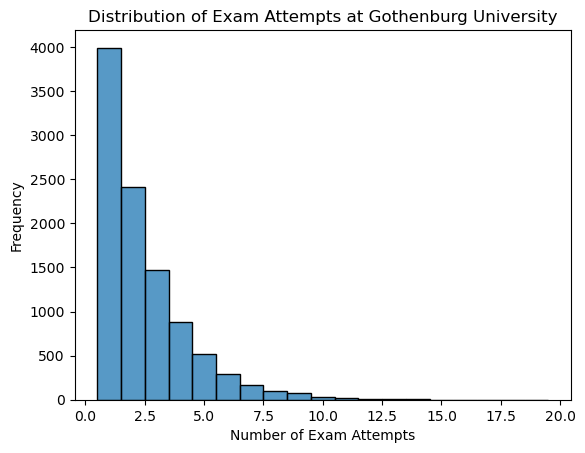

In [19]:
def number_of_attempts(p_pass):
    attempts = 0
    while not success(p_pass):
        attempts += 1
    else: 
        return attempts + 1

# Simulation parameters
a_correct = 0.4
attempt_results = [number_of_attempts(a_correct) for _ in range(n_simulations)]

# Plot histogram
sns.histplot(attempt_results, bins=n_instances, kde=False, discrete=True)
plt.xlabel('Number of Exam Attempts')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Attempts at Gothenburg University')
plt.show()

### Part 4: Exploring new visualization techniques for data analysis

In [26]:
titanic_df

,Unnamed: 0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr,1
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs,1
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss,0
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs,1
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0,211536,Rev,0
887,887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1,112053,Miss,0
888,888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0,W./C. 6607,Miss,3
889,889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1,111369,Mr,0


/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


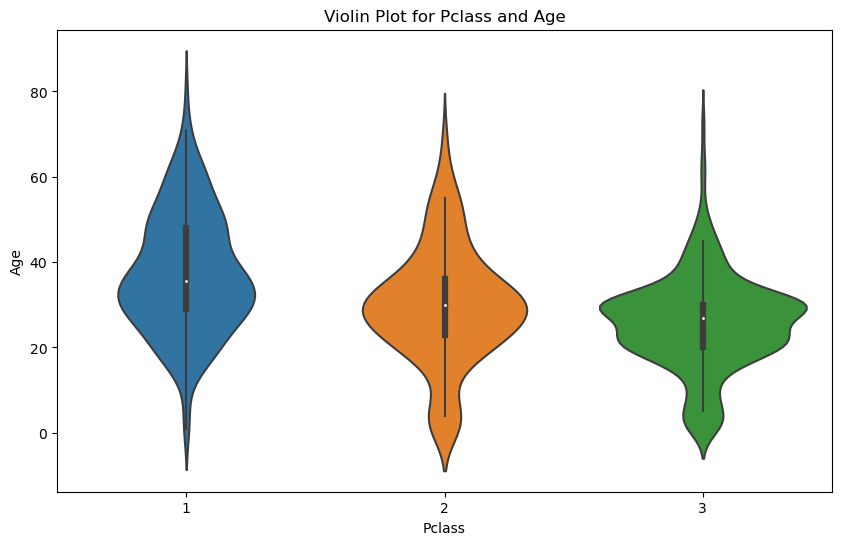

In [21]:
# violin plot for Pclass and Age
plt.figure(figsize=(10, 6))
sns.violinplot(data=titanic_df, x='Pclass', y='Age')
plt.title('Violin Plot for Pclass and Age')
plt.show()


/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

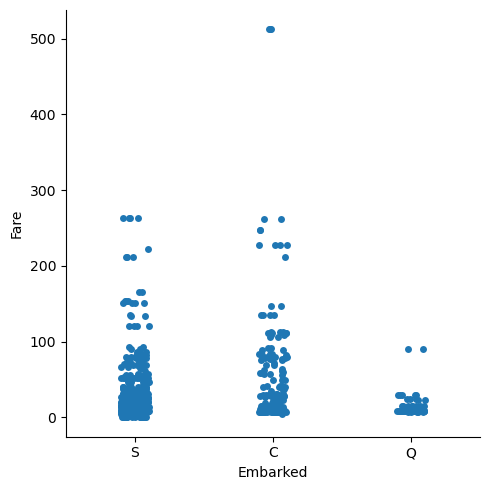

In [39]:

sns.catplot(data=titanic_df, x='Embarked', y='Fare')

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Pclass', ylabel='Count'>

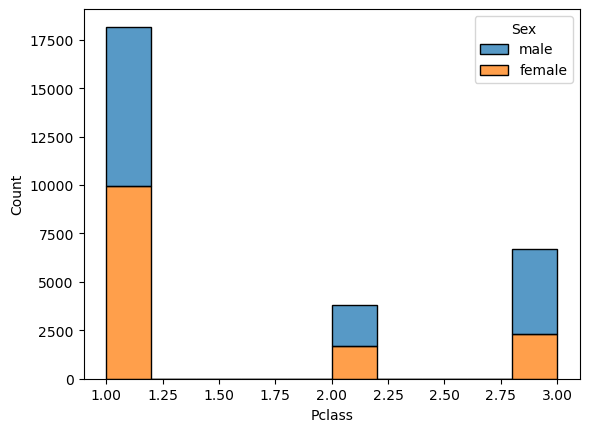

In [50]:
sns.histplot(titanic_df, x='Pclass', hue='Sex', multiple='stack', weights='Fare')

/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faerazo/opt/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Pclass', ylabel='Fare'>

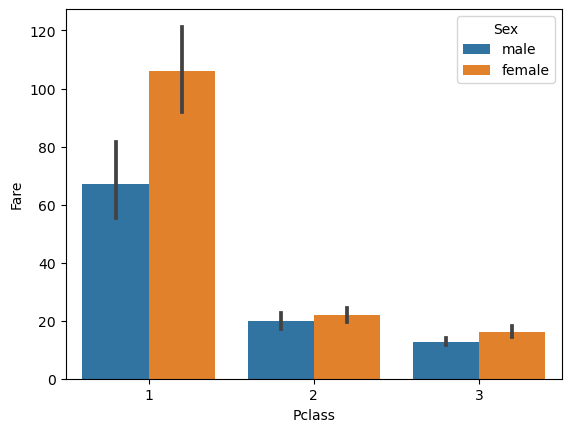

In [51]:
sns.barplot(data=titanic_df, x='Pclass', y='Fare', hue='Sex')